# ECS759P Lab3 - Informed and Local Search

In [ ]:
# Mounting the Google Drive folder (run if necessary)
from google.colab import drive
drive.mount('/content/drive/')
# Saving the present working directory's path
pwd = "/content/drive/MyDrive/ColabNotebooks/AI-Labs/AI-Lab3-InformedSearch/" # Present working directory

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Recap

Last week we went through examples of **uninformed** search using *DFS* and *BFS*. These algorithms are primarily concerned with finding **a** solution. The **uninformed** search algorithm that takes into account the path costs of the solution and find the minimum cost one is *UCS*. However, we are leaving that to your coursework 1.

## Before you proceed

Make sure you have the `middle_labyrinth.json` file in the same directory as this notebook. If you don't know how, ask for help.

# Informed Search with A*



All of these search algorithms mentioned above, DFS, BFS and UCS are *uninformed* (*blind*). For some problems, you can *help* the search by introducing some side information based on the nature of the problem. We will investigate this idea by applying the __A*__ search to an example problem.


## Moving in a labyrinth like a pro
Let's try to solve the same problem as last week but with A\*, an informed search algorithm. Just for reminder, A\* is a search algorithm that uses a combination of a **cost** function and **admissible heuristics** (which is an estimation of the remaining cost to get to the destination) in order to find the best path in a more efficient way. Let's take for instance the following 10x10 labyrinth:

![alt text](https://drive.google.com/uc?id=1UX1EjbQl7kQ9EeW26cn1ArYHgUsAJWkR)

Knowing that the initial state (or entrance) is encoded as the state `(0,0)` and the goal state (or exit) is encoded as `(9,9)`, can you come up with a simple heuristic allowing you to find the path faster? (**Try to think a bit before reading the next part**)


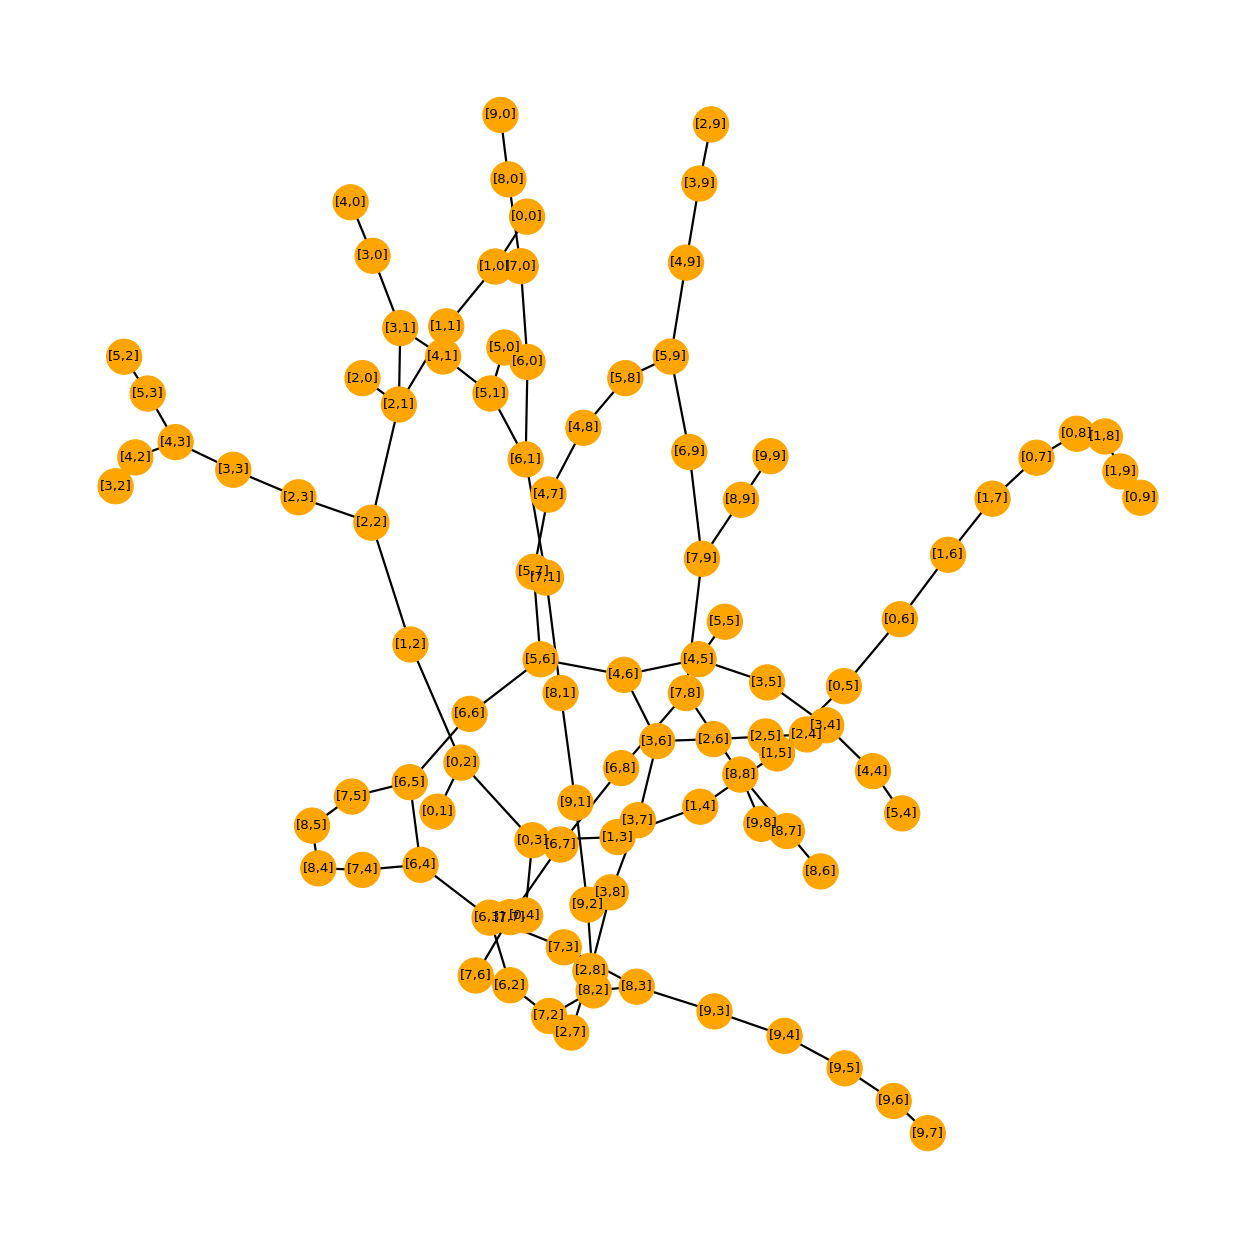

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import json

def load_graph_from_file(filename):
  with open(filename) as labyrinth_file:
    dict_labyrinth = json.load(labyrinth_file)
    return nx.Graph(dict_labyrinth)

def show_weighted_graph(networkx_graph, node_size, font_size, fig_size):
  # Allocate the given fig_size in order to have space for each node
  plt.figure(num=None, figsize=fig_size, dpi=80)
  plt.axis('off')
  # Compute the position of each vertex in order to display it nicely
  nodes_position = nx.spring_layout(networkx_graph)
  # You can change the different layouts depending on your graph
  # Extract the weights corresponding to each edge in the graph
  edges_weights  = nx.get_edge_attributes(networkx_graph,'weight')
  # Draw the nodes (you can change the color)
  nx.draw_networkx_nodes(networkx_graph, nodes_position, node_size=node_size,
                         node_color = ["orange"]*networkx_graph.number_of_nodes())
  # Draw only the edges
  nx.draw_networkx_edges(networkx_graph, nodes_position,
                         edgelist=list(networkx_graph.edges), width=2)
  # Add the weights
  nx.draw_networkx_edge_labels(networkx_graph, nodes_position,
                               edge_labels = edges_weights)
  # Add the labels of the nodes
  nx.draw_networkx_labels(networkx_graph, nodes_position, font_size=font_size,
                          font_family='sans-serif')
  plt.axis('off')
  plt.show()

middle_labyrinth = load_graph_from_file(pwd + "middle_labyrinth.json")
show_weighted_graph(middle_labyrinth, 1000, 12, (20,20))

Although different heuristics can help finding the path quicker, in order to be useful for A\*, the heuristic needs to be **admissible** and, for graph search version, **consistent (monotonous)**:

- **Admissible** means that it should *never over-estimate* the cost of reaching the goal.
- **Consistent** means that if the heuristic cost of each node (which is an estimation of the cost to get to the goal from that node) is no more than the cost of getting to one of its successors plus the heuristic cost of that successor (refer to the triangle inequality).

Finally, the heuristic cost on a goal node should be zero.

Here, since we know the coordinates of all the cells, the idea would be to favour moving in the general direction of the goal compared to moving back.

One way to quantify this is using the **Manhattan distance**  between a given cell and the exit cell as our heuristic.

The Manhattan distance, (a.k.a. taxi-cab distance, or city-block distance, or L-1 distance) is defined as the (absolute) difference between the row indices of the current position and goal, plus the (absolute) difference between their column indices. So it is similar to the good-old-fashioned Euclidean distance, except that instead of squaring the differences of the elements, we use the absolute value of the differences of the elements.


For instance the Manhattan distance between the entrance and the exit is `|x_1 - x_2| + |y_1 - y_2| = |0-9| + |0-9| = 18`.

**Q. Try to understand and explain why such distance makes the heuristic admissible (you should primarily answer why it never over-estimates the remaining cost to reach the goal). Try to find another admissible heuristic and a non-admissible one.**

**Q. By filling the gaps in the code below, create a function that takes as input a node in the labyrinth graph (identified by its pair of indices) and returns the Manhattan distance between that node and the exit.**

This will be our $h(n)$ in our A* algorithm.

In [ ]:
# Calculating the admissible heuristic of a node (Manhattan distance)
def heuristic(node, goal):
    node, goal = getNodeAsList(node), getNodeAsList(goal)
    return abs(goal[0]-node[0]) + abs(goal[1]-node[1])

# An example usage should be:
# heuristic("[0,0]"") = 18, and heuristic("[9,9]"") = 0.

# Helper function for the above
def getNodeAsList(node):
    # I know the format is [X,Y]
    node = node.replace('[','') # remove brackets
    node = node.replace(']','')
    x, y = node.split(',', maxsplit=2) # Split values by ','
    return [float(x), float(y)]

You are now ready to implement your A* algorithm. If you need a reminder, A* is just the UCS, except that the cost of each node is $f(n)=g(n)+h(n)$, as opposed to only $g(n)$, where $g(n)$ is the path-cost, and $h(n)$ is the heuristic cost.

**Q. By filling the gaps in the code below, implement the A* algorithm and find the best-path in our labyrinth.**


HINT: If you are stuck, have a look at these references:

- [search.py](https://github.com/aimacode/aima-python/blob/master/search.py): python implementation of all the search algorithms from chapter 3 of the book.

- [search.ipynb](https://github.com/aimacode/aima-python/blob/master/search.ipynb): a notebook demonstration of those search algorithm.

- [search4e.ipynb](https://github.com/aimacode/aima-python/blob/master/search4e.ipynb): an updated self-containing notebook with a slightly more concise (and sometimes improved) implementation of the same search algorithms

In [ ]:
from queue import PriorityQueue
def Astar(graph, origin, goal):
    h = heuristic(origin, goal)
    visitedNodes = {} # This will contain important data on visited nodes
    visitedNodes[origin] = (h, h)
    # INTENDED FORMAT OF ITEMS:
    # (heuristic cost=h, total cost=h+g)
    # SIDE NOTE 1: g is the path cost (calculated cost from origin to node)
    # SIDE NOTE 2: For origin node, g=0, so h+g=h here

    PQ = PriorityQueue()
    PQ.put((h, [origin], 0))
    # INTENDED FORMAT OF ITEMS:
    # (priority, path, path cost),
    # where priority=h+g, path=list of nodes, path cost=g
    # SIDE NOTE: For origin node, g=0, so h+g=h here

    """
    NOTE ON PriorityQueue:
    This is a class that implements the priority queue data structure.
    Items are ordered (by default in ascending order) based on the values or
    (in case of tuple items) the value of the item's first element.
    """

    while not PQ.empty():
        priority, path, pathCost = PQ.get() # Getting highest priority path
        if path[-1] == goal: return path, pathCost # Goal test

        successors = list(graph.neighbors(path[-1]))
        for s in successors:
            # If already visited, we will not recalculate the heuristic
            # (it is a good practice, especially when scaling up)
            try: h = visitedNodes[s][0]
            except: h = heuristic(s, goal)

            # We are taking transition cost between two nodes to be 1 here
            # (but in general, it is the weight between the nodes)
            transitionCost = 1

            # Total cost (h+g, where g now is pathCost+transitionCost)
            aStarCost = h + pathCost + transitionCost

            # Adding successor nodes to the priority queue
            if s not in visitedNodes.keys() or visitedNodes[s][1] > aStarCost:
                PQ.put((aStarCost, path+[s], pathCost+1))
                visitedNodes[s] = (h, aStarCost)

    return "No path found", visitedNodes[goal] # I will return the goal information, it will have both the total cost and the path


In [ ]:
#  create the graph from the json file
labyrinth = load_graph_from_file(pwd + "middle_labyrinth.json")
solution = Astar(labyrinth,"[0,0]","[9,9]")
print(f"Path:\n{solution[0]}\nPath cost (or visited nodes if path not found):\n{solution[1]}")

Path:
['[0,0]', '[1,0]', '[1,1]', '[2,1]', '[2,2]', '[1,2]', '[0,2]', '[0,3]', '[1,3]', '[1,4]', '[1,5]', '[2,5]', '[2,6]', '[3,6]', '[4,6]', '[5,6]', '[5,7]', '[4,7]', '[4,8]', '[5,8]', '[5,9]', '[6,9]', '[7,9]', '[8,9]', '[9,9]']
Path cost (or visited nodes if path not found):
24


---
# Local Search with Simulated Annealing

Simulated annealing is an empirical optimization method. As its name suggests, it makes the analogy between the way metals are handled by different firings to obtain a crystalline structure of minimum energy and the search for a **minimum of a cost function**. In a simple version, the algorithm can be considered as follows when looking for the minimum of a function $f$:

1. **Initialization**: The starting point is a point $x_0$ and a temperature $T_0$.
2. **Visiting a neighbour**: We randomly move to visit a neighbour of the current state $x$, defined as $x_{t+1} = x_t + D$. $D$ is a random variable (from a Gaussian) of mean zero and variance $\kappa e^{-1/(1000\times T)}$ where $\kappa$ is a parameter.
3. **Heat evaluation**: We evaluate $f(x_{t+1})$. If the solution is better (i.e $f(x_{t+1})$ < $f(x_t)$ ) we keep it **OTHERWISE** we keep it with a probability of $\kappa' e^{-1/(1000\times T)}$, where $\kappa'$ is another parameter.
4. **The annealing schedule**: We decrease the temperature $T$.

Main ideas of simulated annealing:

- Escape local maxima by allowing some bad moves
- Gradually decrease size and frequency of allowed bad moves as search proceeds


Note that the stop criterion can be a threshold stating whether the solution is acceptable or a number of maximum iterations.

## Snowboarding

A ski resort wants to open a new extreme slope for next year. So it calls in a landscape architect who is in charge of designing it. It comes back to you later on with a simple mathematical formula modeling, at a scale of 1/1000, the slope of his dream:
$f(x) = x^4 − x^3 − 20x^2 + x + 1$

Using the following function, you decide to visualize it.

In [ ]:
import math
import random
# Example usage of the pseudorandom number geneartor
[random.random() for T in range(3)]

[0.5034918371457817, 0.23266512200713863, 0.0426165844293841]

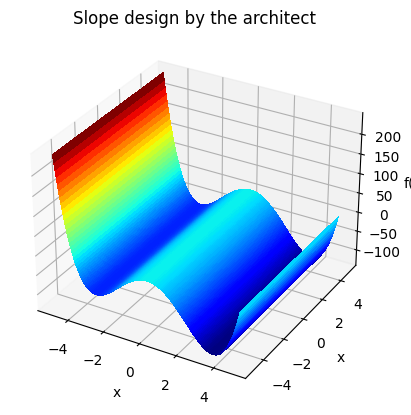

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# Function allowing to have a nice plot of function
def visualize_function(x_values, y_values, z_values, x_label, y_label, z_label, title):
  fig = plt.figure() # opens a figure environment
  ax = fig.add_subplot(projection='3d') # to perform a 3D plot
  surf = ax.plot_surface(x_values, y_values, z_values, rstride=1, cstride=1, linewidth=0, antialiased=False , cmap = cm.jet) #plot definition and options
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_zlabel(z_label)
  plt.title(title)
  plt.show()

X = np.arange(-5, 5, 0.05) # values for X
Y = np.arange(-5, 5, 0.05) # values for X
X, X = np.meshgrid(X, X) # creates a squared grid on which to plot the function values (Z)
Z = X**4 - X**3 - 20*X**2 + X +1 # defines the function values

visualize_function(X, Y, Z, "x", "x", "f(x)", "Slope design by the architect")

When looking at it, you just realise that it is indeed quite extreme. Apparently the architect likes steep slopes. However, your goal is to make it enjoyable for more people. In order to do so, you want to install snow cannons a bit everywhere to smooth it out. Unfortunately, the designer had a pretty bad accident skiing and cannot tell you the most crucial point: where are the deepest cavities. Therefore, you decide to find where it is by implementing the simulated annealing.

**Q. By filling the gaps below, create a function taking as input the initial point ($x_0$), the two parameters ($\kappa$ and $\kappa'$), $t_0$ and $t_{max}$. The last two parameters determine the bound of the minimal and maximal temperature with $T_{max} = 1 / t_0$ and $T_{min} = 1 / t_{max}$ with $t$ being incremented by step of `1`. Your function should return two lists. The first one contains all the values $x$ that you visited and the other one the corresponding $f(x)$. Use the following parameters: $x_0 = 0$, $\kappa = 10$, $\kappa' = 0.5$, $t_{min} = 1$ and $t_{max} = 1000$.**

In [ ]:
# Your function for the simulated annealing
import random
import math
import numpy as np

def function(X):
    Y = X**4 - X**3 - 20*X**2 + X + 1 # defines the function values
    return Y

def simulatedAnnealingStep(X, k, kPrime, T0):
    # T0 is the initial & maximum temperature
    # Initial parameters
    noiseAmplitude = 0.6

    Y = function(X)
    for T in range(T0,0,-1): # Will go from T0 to 0
        var = k*math.exp(-1/(1000*T))
        noise = np.random.normal(0, np.sqrt(var))
        X1 = X + noise*noiseAmplitude
        Y1 = function(X1)

        selectionProbability = kPrime*math.exp(-1/(1000*T))
        """
        NOTE ON PROBABILISTIC SELECTION:
        random.random() selects a random variable between 0 and 1 with uniform
        probability, Thus, we have a `selectionProbability` chance of getting
        `random.random() < selectionProbability` as `True`.
        """
        if Y1 < Y or random.random() < selectionProbability: X, Y = X1, Y1
    return (X, Y)

def simulatedAnnealing(X, k, kPrime, T0, nIterations):
    results, MINX, MINY = [], X, function(X)
    for i in range(nIterations):
        n = simulatedAnnealingStep(MINX, k, kPrime, T0)
        if n[1] < MINY: MINX, MINY = n
        results.append(n)
    return MINX, MINY

In [ ]:
result = simulatedAnnealing(0, 10, 0.5, 1000, 100)
print(f"Minimum found at point: {result}")

Minimum found at point: (3.5273906756626854, -133.3963819490309)


**Q. What is the global minimum found by your algorithm? If you run 10 times your function, would you get always the same result? Why? How many values have you visited before finding the global minimum?**

**Q. Play with the values of $\kappa$, $\kappa'$ and $t_{max}$ to fully understand their impact. Modify the way the temperature changes with another function (e.g., exponential decay schedule).**